In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math
import glob
import itertools

In [16]:
for i in range(1,53):
    mean = []
    subject = pd.read_csv(f'Pupil Data\Pupil Data\subject_{i}_behave.csv')
    ind = subject.set_index('Time')
    behave = pd.read_csv(f'Behavioral Data\Behavioral Data\subject_{i}_behave.csv')
    start = behave['Time']
    end = behave['Time'] + behave['RT']
    
    for j in range(40):
        baseline = int(4*round(start[j]/4))
        if not math.isnan(end[j]):
            endline = int(4*round(end[j]/4))
        else:
            endline = int(4*round((start[j]+8000)/4))
        m = ind.loc[baseline:endline].sub(ind.loc[baseline])
        mean.append(m['Pupil Diameter'].to_numpy())
    T = list(itertools.zip_longest(*mean, fillvalue=np.nan))
    ave = [np.nanmean(i) for i in T]
    ave = np.array(ave, dtype=object)
    y = np.arange(0, len(ave)*4, 4)
    plt.figure(figsize=(16,4))
    plt.plot(y,ave, label='Pupil Diameter')
    plt.xlabel("miliseconds")
    plt.ylabel("milimeters")
    plt.title(f"Ave. Pupil Diameter of Subject {i}/Trial")
    plt.legend()
    plt.grid()
    plt.savefig(f'graphs/ave_subj/subject{i}.png')
    plt.close()

In [3]:
mean = []
incorrect = []
correct = []
easy = []
hard = []
for i in range(1,53):
    subject = pd.read_csv(f'Pupil Data\Pupil Data\subject_{i}_behave.csv')
    ind = subject.set_index('Time')
    behave = pd.read_csv(f'Behavioral Data\Behavioral Data\subject_{i}_behave.csv')
    
    start = behave['Time']
    end = behave['Time'] + behave['RT']
    
    for j in range(40):
        baseline = int(4*round(start[j]/4))
        if not math.isnan(end[j]):
            endline = int(4*round(end[j]/4))
        else:
            endline = int(4*round((start[j]+8000)/4))
        m = ind.loc[baseline:endline].sub(ind.loc[baseline])
        mean.append(m['Pupil Diameter'].to_numpy())
        if behave['Difficulty'][j] == 1:
            easy.append(m['Pupil Diameter'].to_numpy())
        elif behave['Difficulty'][j] == 2:
            hard.append(m['Pupil Diameter'].to_numpy())
        if behave['isCorrect'][j] == 0:
            incorrect.append(m['Pupil Diameter'].to_numpy())
        elif behave['isCorrect'][j] == 1:
            correct.append(m['Pupil Diameter'].to_numpy())

In [4]:
T = list(itertools.zip_longest(*mean, fillvalue=np.nan))
ave = [np.nanmean(i) for i in T]
ave = np.array(ave, dtype=object)
y = np.arange(0, len(ave)*4, 4)

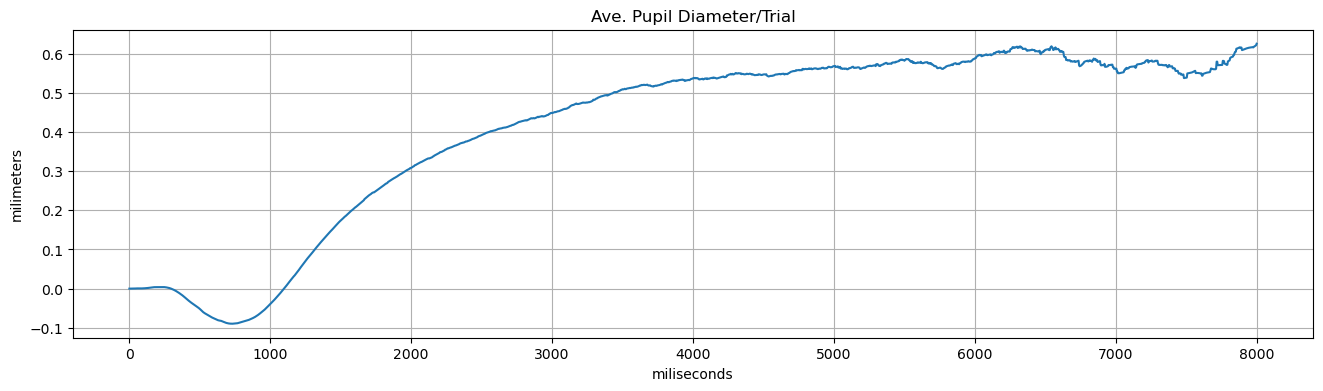

In [5]:
plt.figure(figsize=(16,4))
plt.plot(y, ave, label='Pupil Diameter')
plt.xlabel("miliseconds")
plt.ylabel("milimeters")
plt.title(f"Ave. Pupil Diameter/Trial")
plt.grid()


In [6]:
T = list(itertools.zip_longest(*easy, fillvalue=np.nan))
ease = [np.nanmean(i) for i in T]
ease = np.array(ease, dtype=object)
y = np.arange(0, len(ease)*4, 4)

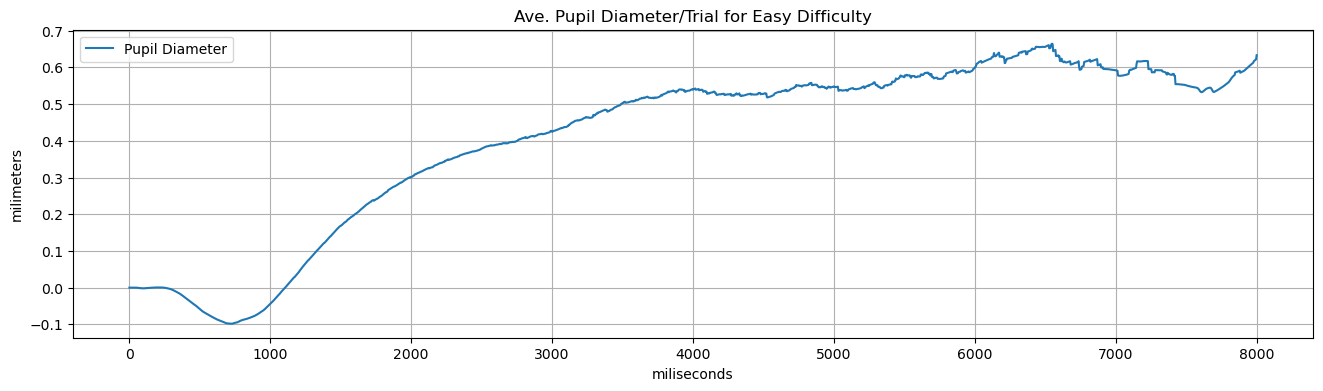

In [7]:
plt.figure(figsize=(16,4))
plt.plot(y, ease, label='Pupil Diameter')
plt.xlabel("miliseconds")
plt.ylabel("milimeters")
plt.title(f"Ave. Pupil Diameter/Trial for Easy Difficulty")
plt.legend(loc="upper left")
plt.grid()

In [8]:
T = list(itertools.zip_longest(*hard, fillvalue=np.nan))
hrd = [np.nanmean(i) for i in T]
hrd = np.array(hrd, dtype=object)
y = np.arange(0, len(hrd)*4, 4)

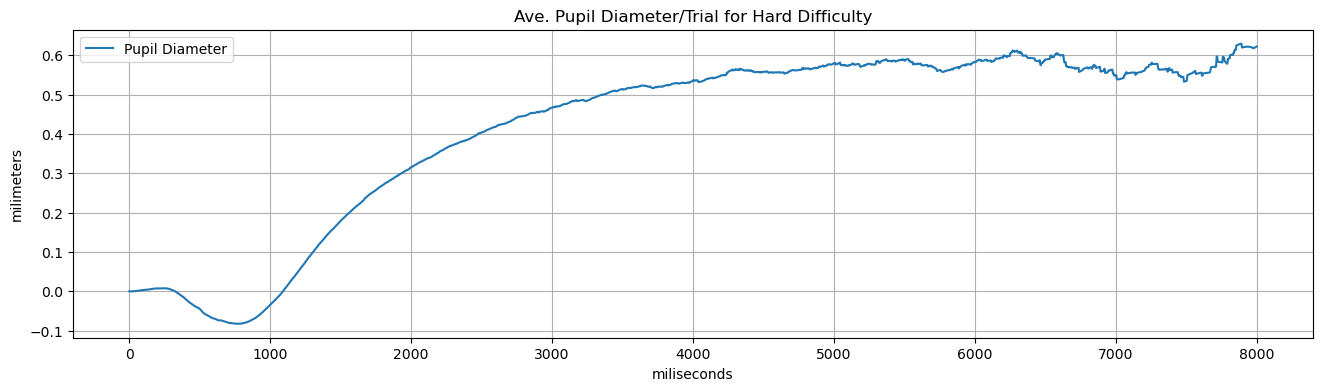

In [9]:
plt.figure(figsize=(16,4))
plt.plot(y, hrd, label='Pupil Diameter')
plt.xlabel("miliseconds")
plt.ylabel("milimeters")
plt.title(f"Ave. Pupil Diameter/Trial for Hard Difficulty")
plt.legend(loc="upper left")
plt.grid()

In [10]:
T = list(itertools.zip_longest(*incorrect, fillvalue=np.nan))
inc = [np.nanmean(i) for i in T]
inc = np.array(inc, dtype=object)
y = np.arange(0, len(inc)*4, 4)

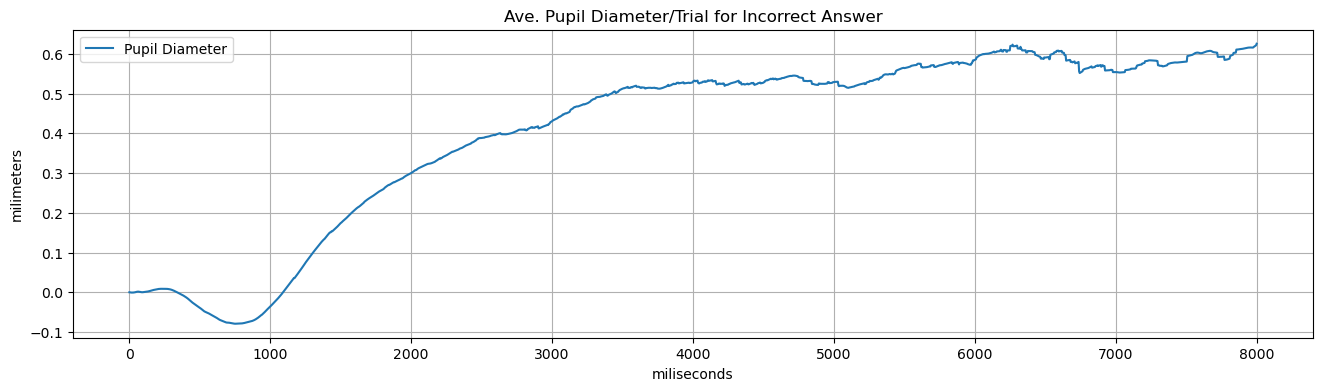

In [11]:
plt.figure(figsize=(16,4))
plt.plot(y, inc, label='Pupil Diameter')
plt.xlabel("miliseconds")
plt.ylabel("milimeters")
plt.title(f"Ave. Pupil Diameter/Trial for Incorrect Answer")
plt.legend(loc="upper left")
plt.grid()

In [12]:
T = list(itertools.zip_longest(*correct, fillvalue=np.nan))
crr = [np.nanmean(i) for i in T]
crr = np.array(crr, dtype=object)
y = np.arange(0, len(crr)*4, 4)

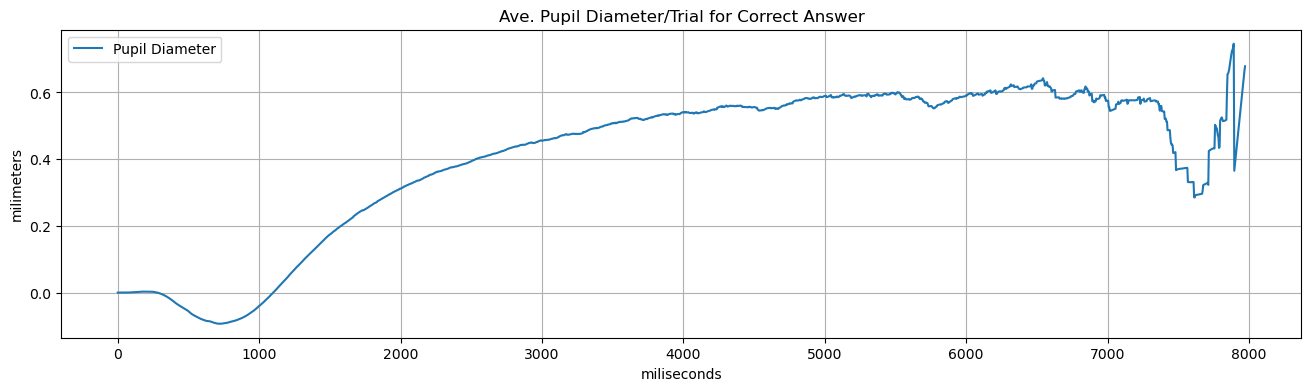

In [13]:
plt.figure(figsize=(16,4))
plt.plot(y, crr, label='Pupil Diameter')
plt.xlabel("miliseconds")
plt.ylabel("milimeters")
plt.title(f"Ave. Pupil Diameter/Trial for Correct Answer")
plt.legend(loc="upper left")
plt.grid()